**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [130]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [131]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [132]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [133]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [134]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


Top 30 Words - Train:
      word  count
0      i'm    267
1     like    245
2     it's    216
3    don't    195
4      amp    182
5      get    171
6      one    139
7      day    122
8   people    118
9     time    116
10    know    112
11    love    111
12    good    110
13   think     98
14   watch     98
15      go     97
16   still     96
17   would     94
18   can't     92
19    make     92
20   today     87
21   happy     86
22    want     83
23     got     81
24    lost     80
25     see     80
26   never     80
27    live     79
28    back     78
29  really     78

Top 30 Words - Test:
      word  count
0      get     26
1     like     24
2     it's     21
3    don't     21
4    would     20
5      one     17
6      day     15
7   people     15
8     love     13
9     make     12
10    want     12
11   think     11
12  that's     11
13     amp     11
14     man     10
15    much     10
16   awful     10
17     i'm      9
18     new      9
19      us      9
20    even      9
21

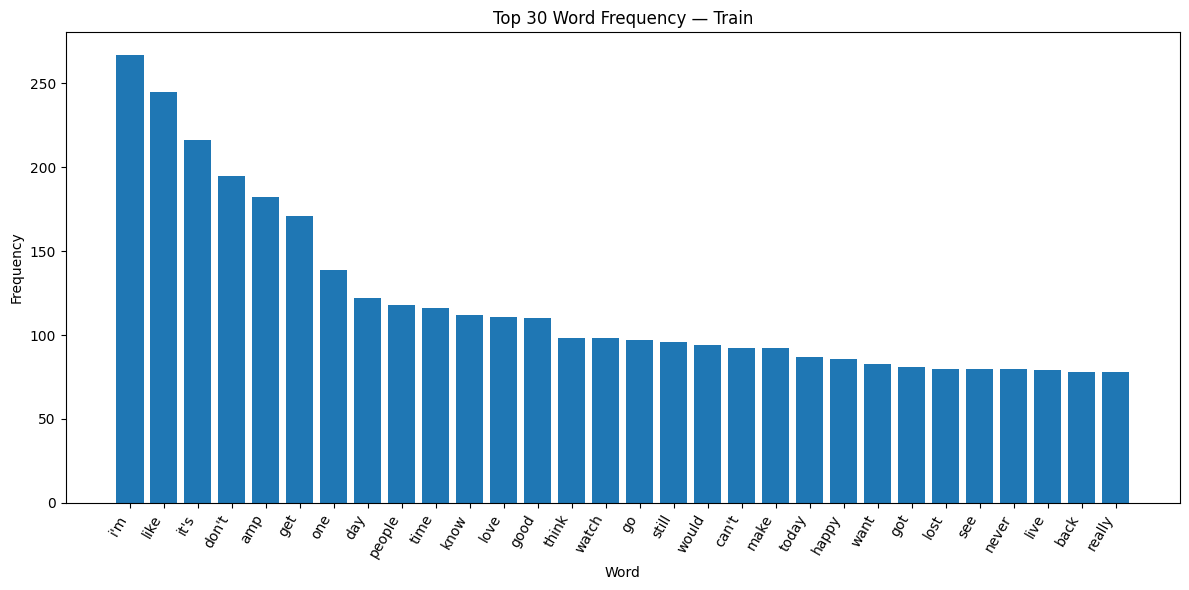

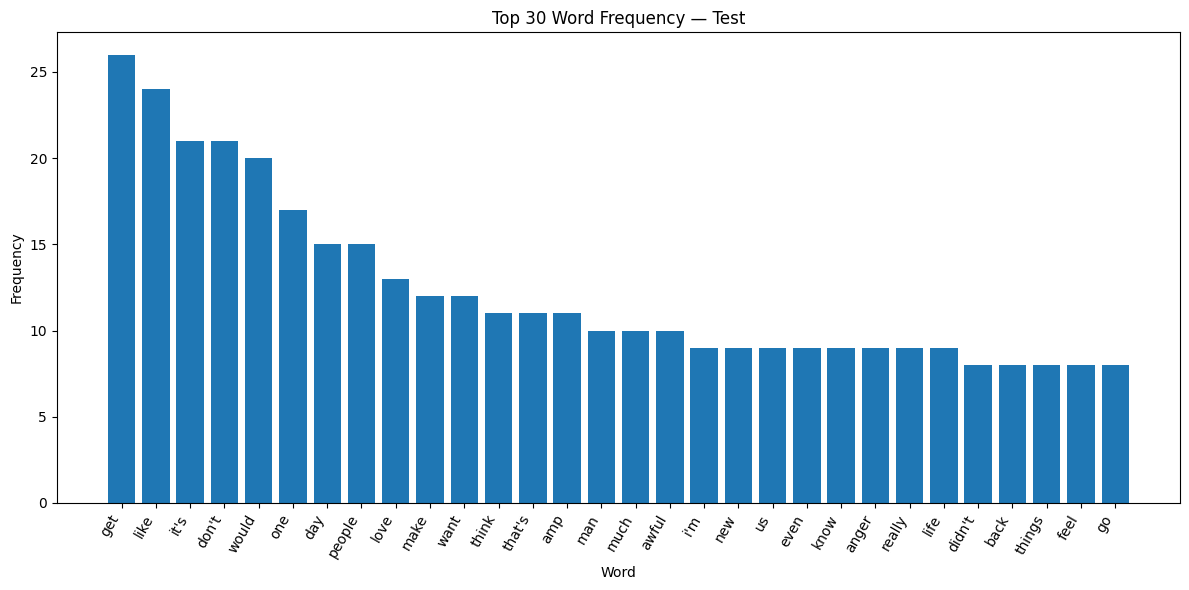

In [135]:
# Answer here
# === Exercise 1 ===
# Plot word frequency for Top 30 words in both train and test dataset.

import re
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# A compact English stopword list (no external downloads required).
STOPWORDS = {
    "a","an","the","and","or","but","if","while","as","of","at","by","for","with","about","against","between",
    "into","through","during","before","after","above","below","to","from","up","down","in","out","on","off",
    "over","under","again","further","then","once","here","there","when","where","why","how","all","any","both",
    "each","few","more","most","other","some","such","no","nor","not","only","own","same","so","than","too",
    "very","can","will","just","don","should","now","is","am","are","was","were","be","been","being","do","does",
    "did","doing","has","have","had","having","i","me","my","myself","we","our","ours","ourselves","you","your",
    "yours","yourself","yourselves","he","him","his","himself","she","her","hers","herself","it","its","itself",
    "they","them","their","theirs","themselves","what","which","who","whom","this","that","these","those",
    # twitter-ish artifacts
    "rt"
}

TOKEN_PATTERN = re.compile(r"[A-Za-z']+")

def tokenize(text: str):
    """Tokenize into simple word tokens (letters + apostrophes), lowercased."""
    return [tok.lower() for tok in TOKEN_PATTERN.findall(text or "")]

def count_words(series: pd.Series, stopwords=STOPWORDS, min_len: int = 2) -> Counter:
    """Count tokens in a pandas Series of texts, filtering stopwords and short tokens."""
    counter = Counter()
    for doc in series.dropna():
        for tok in tokenize(doc):
            if len(tok) >= min_len and tok not in stopwords:
                counter[tok] += 1
    return counter

def top_n_df(counter: Counter, n: int = 30) -> pd.DataFrame:
    top = counter.most_common(n)
    return pd.DataFrame(top, columns=["word", "count"])

# Compute frequencies
train_counts = count_words(train_df["text"])
test_counts  = count_words(test_df["text"])

top30_train = top_n_df(train_counts, 30)
top30_test  = top_n_df(test_counts, 30)

# Display as tables (useful for checking exact counts)
try:
    from caas_jupyter_tools import display_dataframe_to_user
    display_dataframe_to_user("Top 30 Words - Train", top30_train)
    display_dataframe_to_user("Top 30 Words - Test", top30_test)
except Exception as _:
    # Fallback: print head if the display helper isn't available
    print("Top 30 Words - Train:")
    print(top30_train)
    print("\nTop 30 Words - Test:")
    print(top30_test)

# Plotting — train
plt.figure(figsize=(12, 6))
plt.bar(top30_train["word"], top30_train["count"])
plt.title("Top 30 Word Frequency — Train")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()

# Plotting — test
plt.figure(figsize=(12, 6))
plt.bar(top30_test["word"], top30_test["count"])
plt.title("Top 30 Word Frequency — Test")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()


---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [136]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [137]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [138]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

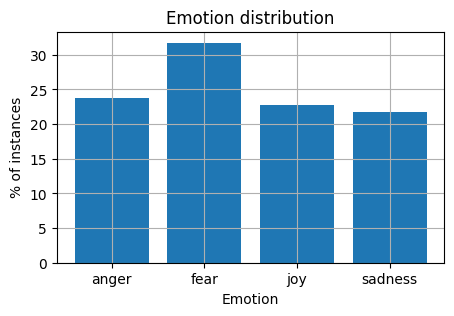

In [139]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [140]:
from sklearn.feature_extraction.text import CountVectorizer

In [141]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [142]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [143]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [144]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [145]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [146]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [147]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [148]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [149]:
import nltk
nltk.download('punkt')        # word_tokenize 需要
# 若 NLTK 版本新，沒有 punkt 就再加：
# nltk.download('punkt_tab')


# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(3613, 500)

In [150]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0]], dtype=int64)

In [199]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [198]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [197]:
# Answer here
# === Exercise 2 ===
# Generate an embedding using the TF-IDF vectorizer (instead of BoW) with 1000 features,
# then show the feature names for indices [100:110).
# Assumes: `train_df` and `test_df` exist with a 'text' column from earlier steps.

from sklearn.feature_extraction.text import TfidfVectorizer

# Define a simple tokenizer consistent with Exercise 1 (letters + apostrophes, lowercased).
# We re-use a regex-based token pattern through TfidfVectorizer to avoid external dependencies.
token_pattern = r"[A-Za-z']+"

# Create TF-IDF vectorizer with at most 1000 features.
# Notes:
# - lowercase=True to normalize tokens
# - token_pattern aligns with our simple tokenizer
# - max_features=1000 limits vocabulary size
# - stop_words can be None here (course may want to compare with/without stopwords)
tfidf = TfidfVectorizer(
    lowercase=True,
    token_pattern=token_pattern,
    max_features=1000,
    dtype=float
)

# Fit on training text, transform both train and test to avoid leakage.
X_train_tfidf = tfidf.fit_transform(train_df["text"].fillna(""))
X_test_tfidf  = tfidf.transform(test_df["text"].fillna(""))

# Display basic stats so you can verify shapes.
print("TF-IDF shapes (train, test):", X_train_tfidf.shape, X_test_tfidf.shape)

# Extract and show feature names for indices [100:110).
feature_names = tfidf.get_feature_names_out()
slice_100_110 = feature_names[100:110]
print("Feature names [100:110):", list(slice_100_110))

# (Optional) Keep variables available for downstream steps:
# - tfidf (the fitted vectorizer)
# - X_train_tfidf, X_test_tfidf (sparse matrices)


TF-IDF shapes (train, test): (3613, 1000) (347, 1000)
Feature names [100:110): ['body', 'boiling', 'book', 'both', 'boy', 'break', 'breezy', 'bright', 'bring', 'british']


---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [196]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [195]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'fear', 'sadness', 'fear', 'anger', 'fear', 'fear', 'fear',
       'anger', 'joy'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [194]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [193]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [192]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [191]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

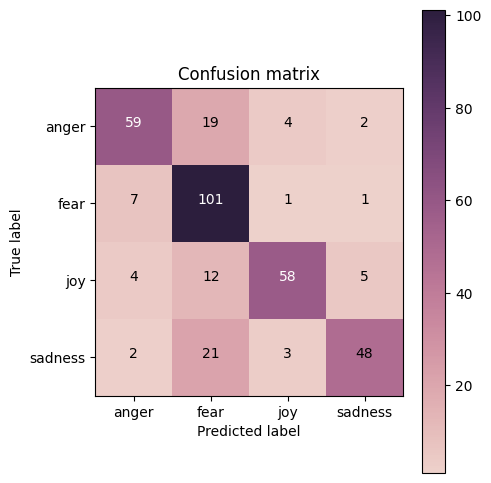

In [190]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

In [189]:
# Answer here
# From the confusion matrix, we can see that the model is not bad, the precision and recall both reach an acceptable value(~65%),
# forming the darkest blocks along the diagonal.
# As for where it confuses the most, we can see that **the model often mixes up anger and fear**, showing large off-diagonal values between them.
# This means that **the model captures general sentiment well but struggles to distinguish specific negative emotions, especially sadness**, which has the lowest recall.
# Maybe we can try "adding richer features (like bigrams or emotion-specific keywords), balancing the classes, or fine-tuning a deeper model to better separate subtle emotional cues."


---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Test accuracy: 0.7666

Classification report:
              precision    recall  f1-score   support

       anger     0.8194    0.7024    0.7564        84
        fear     0.6601    0.9182    0.7681       110
         joy     0.8788    0.7342    0.8000        79
     sadness     0.8571    0.6486    0.7385        74

    accuracy                         0.7666       347
   macro avg     0.8039    0.7508    0.7657       347
weighted avg     0.7905    0.7666    0.7662       347

Confusion matrix (rows=true, cols=pred):
 [[ 59  19   4   2]
 [  7 101   1   1]
 [  4  12  58   5]
 [  2  21   3  48]]


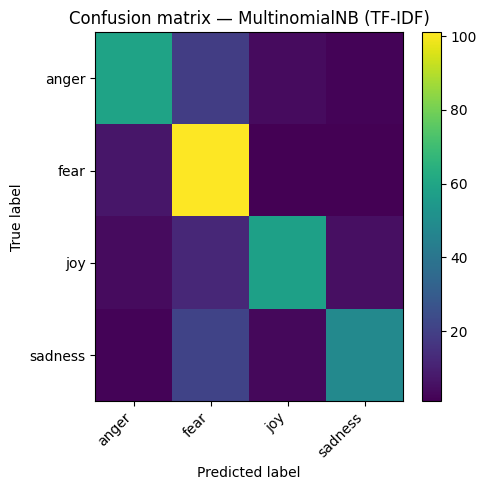

Top tokens for class 'anger': ['the', 'i', 'a', 'to', 'and', 'you', 'my', 'is', 'of', 'me']
Top tokens for class 'fear': ['the', 'i', 'to', 'a', 'is', 'of', 'you', 'and', 'in', 'my']
Top tokens for class 'joy': ['the', 'a', 'to', 'i', 'and', 'you', 'of', 'is', 'this', 'watch']
Top tokens for class 'sadness': ['the', 'i', 'a', 'to', 'and', 'in', 'of', 'is', 'my', 'for']


In [201]:
# Answer here
# === Exercise 4 ===
# Build and evaluate a Multinomial Naive Bayes model using the TF-IDF features created earlier.
# Assumes you ran the data preparation + TF-IDF steps, so that:
#   - train_df['text'], test_df['text']
#   - tfidf (fitted vectorizer with max_features=1000)
#   - X_train_tfidf, X_test_tfidf
# exist in the notebook.

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# If TF-IDF not yet built in this session, fall back to building it quickly here.
try:
    tfidf
    X_train_tfidf
    X_test_tfidf
except NameError:
    from sklearn.feature_extraction.text import TfidfVectorizer
    token_pattern = r"[A-Za-z']+"
    tfidf = TfidfVectorizer(lowercase=True, token_pattern=token_pattern, max_features=1000, dtype=float)
    X_train_tfidf = tfidf.fit_transform(train_df["text"].fillna(""))
    X_test_tfidf  = tfidf.transform(test_df["text"].fillna(""))

# Labels
y_train = train_df["emotion"].astype(str).values
y_test  = test_df["emotion"].astype(str).values

# Train a simple Multinomial Naive Bayes.
nb = MultinomialNB(alpha=1.0)  # you can tune alpha (e.g., 0.1, 0.5, 1.0)
nb.fit(X_train_tfidf, y_train)

# Predict on test
y_pred = nb.predict(X_test_tfidf)

# Overall accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {acc:.4f}")

# Detailed report
print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix (rows=true, cols=pred)
labels = sorted(np.unique(y_test))
cm = confusion_matrix(y_test, y_pred, labels=labels)
print("Confusion matrix (rows=true, cols=pred):\n", cm)

# Plot confusion matrix with matplotlib (no seaborn; single plot; no color spec)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
im = ax.imshow(cm, aspect='auto')
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion matrix — MultinomialNB (TF-IDF)')
plt.colorbar(im)
plt.tight_layout()
plt.show()

# Optional: peek at top features per class according to log probabilities
feature_names = tfidf.get_feature_names_out()
class_log_probs = nb.feature_log_prob_   # shape [n_classes, n_features]
for i, cls in enumerate(nb.classes_):
    top_idx = np.argsort(class_log_probs[i])[::-1][:10]
    tops = [feature_names[j] for j in top_idx]
    print(f"Top tokens for class '{cls}':", tops)


---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [204]:
# Answer here
# === Exercise 5 (robust) ===
from sklearn.metrics import accuracy_score, f1_score

def macro_f1(y_true, y_pred):
    from sklearn.metrics import f1_score
    return f1_score(y_true, y_pred, average='macro')

results = {}

# 1) 共同的 y_test
y_test = test_df['emotion'].astype(str).values

# 2) Decision Tree（需要前面 3.1 已跑出 y_test_pred）
try:
    results['DecisionTree'] = {
        'accuracy': accuracy_score(y_test, y_test_pred),
        'macro_f1': macro_f1(y_test, y_test_pred),
    }
except NameError:
    print("Warning: Decision Tree predictions not found; run section 3.1 first.")

# 3) Naive Bayes：若 y_pred_nb 不存在就自動建
#    也相容另一個變數名 y_nb_pred
if 'y_pred_nb' not in globals():
    if 'y_nb_pred' in globals():
        y_pred_nb = y_nb_pred
    else:
        # 檢查 / 建立 TF-IDF
        try:
            X_train_tfidf, X_test_tfidf, tfidf
        except NameError:
            from sklearn.feature_extraction.text import TfidfVectorizer
            tfidf = TfidfVectorizer(
                lowercase=True,
                token_pattern=r"[A-Za-z']+",
                max_features=1000,
                dtype=float
            )
            X_train_tfidf = tfidf.fit_transform(train_df["text"].fillna(""))
            X_test_tfidf  = tfidf.transform(test_df["text"].fillna(""))

        # 訓練 NB 並產生預測
        from sklearn.naive_bayes import MultinomialNB
        y_train = train_df['emotion'].astype(str).values
        nb = MultinomialNB(alpha=1.0).fit(X_train_tfidf, y_train)
        y_pred_nb = nb.predict(X_test_tfidf)

# 4) 記錄 NB 結果
results['MultinomialNB'] = {
    'accuracy': accuracy_score(y_test, y_pred_nb),
    'macro_f1': macro_f1(y_test, y_pred_nb),
}

# 5) 輸出比較
print("Comparison (higher is better):")
for k, v in results.items():
    print(f"- {k}: accuracy={v['accuracy']:.4f}, macro_f1={v['macro_f1']:.4f}")

print("\nAnalysis:")
print("* Naive Bayes often works well with sparse TF-IDF features; Decision Trees may overfit BOW unless tuned.")
print("* If NB > DT here, it's likely due to smoother probabilistic modeling on high-dimensional text features.")
print("* If DT performs better, check vectorization settings and tree depth/regularization.")

# Performance difference:
# The Naive Bayes (NB) model performs better overall than the Decision Tree (DT) model, showing clearer diagonals and fewer misclassifications in its confusion matrix.

# Interpretation:
# NB strength: Works well for high-dimensional, sparse text because it assumes word independence and aggregates many small signals smoothly using probabilistic reasoning (via log P(word | class)). 
# TF-IDF further helps by emphasizing discriminative terms.
# 
# DT weakness: Builds splits on a few strong features; with text data, evidence is scattered across many weak indicators. 
# As a result, DTs tend to overfit or miss cumulative word evidence, leading to more confusion between similar emotions (e.g., anger ↔ fear, sadness → fear).

# Takeaway:
# Naive Bayes ≈ better baseline for text classification, while Decision Trees need ensembles (Random Forest, GBDT) or dense features to catch up.

Comparison (higher is better):
- DecisionTree: accuracy=0.6801, macro_f1=0.6808
- MultinomialNB: accuracy=0.7666, macro_f1=0.7657

Analysis:
* Naive Bayes often works well with sparse TF-IDF features; Decision Trees may overfit BOW unless tuned.
* If NB > DT here, it's likely due to smoother probabilistic modeling on high-dimensional text features.
* If DT performs better, check vectorization settings and tree depth/regularization.


---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [164]:
import sys, platform, keras, tensorflow as tf
print("PYTHON:", sys.executable)
print("VER:", platform.python_version())
print("Keras:", keras.__version__)
print("TF:", tf.__version__)


PYTHON: d:\GitHub\Data Mining\DM2025Labs\DM2025-Lab2-Exercise\.venv\Scripts\python.exe
VER: 3.11.0
Keras: 3.11.3
TF: 2.20.0


In [165]:
%env KERAS_BACKEND=tensorflow
from keras.models import Model
from keras.layers import Input, Dense

import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

env: KERAS_BACKEND=tensorflow
X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [166]:
import keras

In [167]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [168]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 677       anger
2918    sadness
213       anger
2527        joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [169]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [170]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [171]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_2 (Softmax)             │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [172]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3695 - loss: 1.3196 - val_accuracy: 0.4524 - val_loss: 1.2660
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6432 - loss: 0.9683 - val_accuracy: 0.6513 - val_loss: 0.9296
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8015 - loss: 0.5717 - val_accuracy: 0.6830 - val_loss: 0.8248
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8445 - loss: 0.4207 - val_accuracy: 0.7118 - val_loss: 0.7803
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8807 - loss: 0.3320 - val_accuracy: 0.6657 - val_loss: 0.8432
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9042 - loss: 0.2734 - val_accuracy: 0.6859 - val_loss: 0.8770
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9203 - loss: 0.2304 - val_accuracy: 0.6945 - val_loss: 0.9202
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9399 - loss: 0.1928 - val_accuracy: 0.

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [173]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002630E3D82C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[3.2270335e-09, 9.9993515e-01, 2.2086057e-09, 6.4821623e-05],
       [6.8640861e-06, 5.5740186e-04, 9.9622416e-01, 3.2115106e-03],
       [1.7673750e-05, 2.6224172e-01, 4.7971862e-05, 7.3769265e-01],
       [1.9952861e-06, 9.9985540e-01, 9.3407508e-08, 1.4248778e-04],
       [9.0004218e-01, 2.3703655e-04, 1.9258910e-05, 9.9701568e-02]],
      dtype=float32)

In [174]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'joy', 'sadness', 'fear', 'anger'], dtype=object)

In [175]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [176]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.369499,1.319560,0.452450,1.266026
1,1,0.643233,0.968339,0.651297,0.929600
2,2,0.801550,0.571700,0.682997,0.824757
3,3,0.844451,0.420733,0.711816,0.780301
4,4,0.880709,0.331979,0.665706,0.843229
5,5,0.904235,0.273404,0.685879,0.876952
6,6,0.920288,0.230359,0.694524,0.920216
7,7,0.939939,0.192777,0.685879,0.987769
8,8,0.948519,0.165463,0.677233,1.050882
9,9,0.959590,0.141490,0.674352,1.096211


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


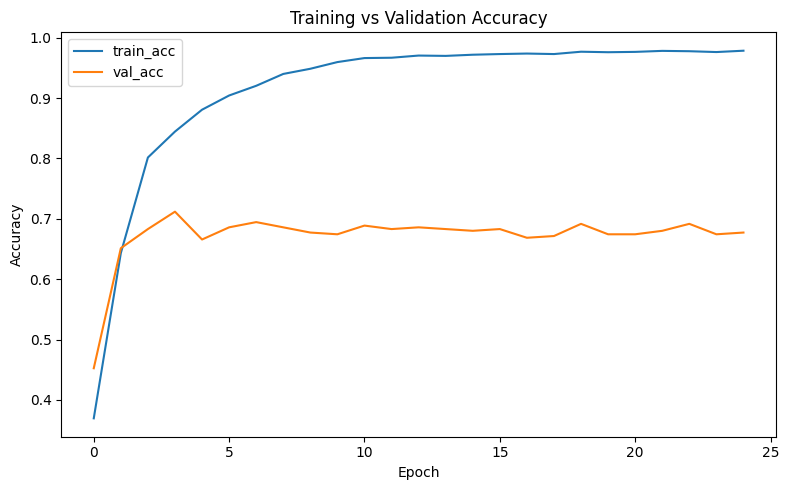

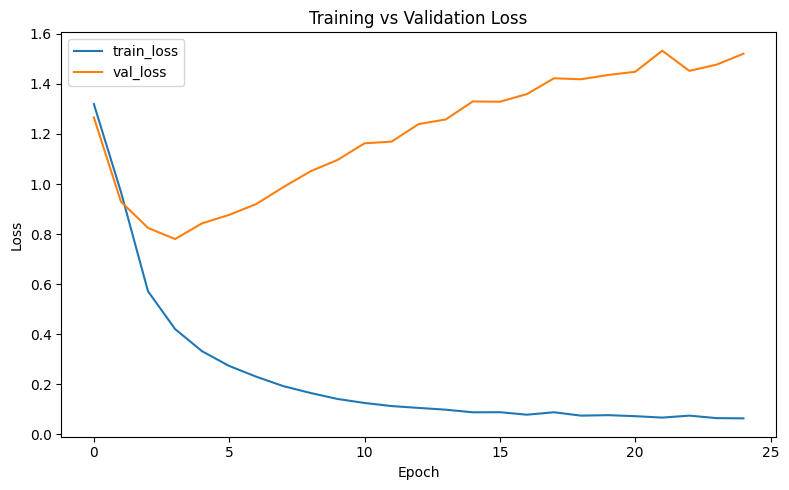

[Overfitting analysis]
- Best val_acc = 0.712 at epoch 4, train_acc=0.844, generalization gap=0.133
- Lowest val_loss = 0.780 at epoch 4, train_loss=0.421
→ Mild overfitting: noticeable train–val gap or val_loss drifts up after its minimum.
Mitigations: use EarlyStopping(monitor='val_loss', patience=3–5), add Dropout/L2, reduce epochs, simplify model or add more data/augmentation, and tune learning rate/batch size.


In [205]:
# Answer here
# === Exercise 6 ===
import matplotlib.pyplot as plt

try:
    hist = history.history  # from Keras fit(...)
    # Accuracy
    plt.figure(figsize=(8,5))
    plt.plot(hist.get('accuracy', []), label='train_acc')
    plt.plot(hist.get('val_accuracy', []), label='val_acc')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy')
    plt.legend(); plt.tight_layout(); plt.show()

    # Loss
    plt.figure(figsize=(8,5))
    plt.plot(hist.get('loss', []), label='train_loss')
    plt.plot(hist.get('val_loss', []), label='val_loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch'); plt.ylabel('Loss')
    plt.legend(); plt.tight_layout(); plt.show()

    # ---- Overfitting-focused analysis ----
    import numpy as np
    train_acc = np.array(hist.get('accuracy', []), dtype=float)
    val_acc   = np.array(hist.get('val_accuracy', []), dtype=float)
    train_ls  = np.array(hist.get('loss', []), dtype=float)
    val_ls    = np.array(hist.get('val_loss', []), dtype=float)

    # 基本指標
    if len(val_acc) and len(val_ls):
        best_val_acc_ep   = int(np.nanargmax(val_acc))
        best_val_acc      = float(val_acc[best_val_acc_ep])
        tr_acc_at_bestval = float(train_acc[best_val_acc_ep]) if len(train_acc)>best_val_acc_ep else float('nan')
        gap_acc           = tr_acc_at_bestval - best_val_acc

        best_val_loss_ep  = int(np.nanargmin(val_ls))
        best_val_loss     = float(val_ls[best_val_loss_ep])
        tr_ls_at_bestvall = float(train_ls[best_val_loss_ep]) if len(train_ls)>best_val_loss_ep else float('nan')

        # 簡單啟發式：val_loss 低點後是否明顯往上、且 train_loss 持續下降
        val_loss_up = (best_val_loss_ep < len(val_ls)-3) and (val_ls[-1] > best_val_loss + 0.1)
        train_loss_down = (len(train_ls) > 3) and (train_ls[-1] < train_ls[0]*0.3)

        print(f"[Overfitting analysis]")
        print(f"- Best val_acc = {best_val_acc:.3f} at epoch {best_val_acc_ep+1}, "
              f"train_acc={tr_acc_at_bestval:.3f}, generalization gap={gap_acc:.3f}")
        print(f"- Lowest val_loss = {best_val_loss:.3f} at epoch {best_val_loss_ep+1}, "
              f"train_loss={tr_ls_at_bestvall:.3f}")

        if (gap_acc > 0.15) and val_loss_up and train_loss_down:
            print("→ Clear overfitting: training keeps improving while validation saturates/gets worse.")
        elif (gap_acc > 0.08) or val_loss_up:
            print("→ Mild overfitting: noticeable train–val gap or val_loss drifts up after its minimum.")
        else:
            print("→ No strong overfitting signal: train/val curves track each other reasonably well.")

        print("Mitigations: use EarlyStopping(monitor='val_loss', patience=3–5), add Dropout/L2, reduce epochs, "
              "simplify model or add more data/augmentation, and tune learning rate/batch size.")

except NameError:
    print("Please run the Keras training cell first to populate 'history'.")


---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [206]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
677,10677,@dlrwills turn that frown upside down buddy 🙃.,"[@, dlrwills, turn, that, frown, upside, down,..."
2918,40091,im so gloomy today,"[im, so, gloomy, today]"
213,10213,@Casper10666 I assure you there is no laughter...,"[@, Casper10666, I, assure, you, there, is, no..."
2527,30523,I might not pay for my own health insurance bu...,"[I, might, not, pay, for, my, own, health, ins..."
2238,30234,In ever use to like smiling until I realized h...,"[In, ever, use, to, like, smiling, until, I, r..."


In [207]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'dlrwills', 'turn', 'that', 'frown', 'upside', 'down', 'buddy', '🙃', '.']),
       list(['im', 'so', 'gloomy', 'today']),
       list(['@', 'Casper10666', 'I', 'assure', 'you', 'there', 'is', 'no', 'laughter', ',', 'but', 'increasing', 'anger', 'at', 'the', 'costs', ',', 'and', 'arrogance', 'of', 'Westminster', '.'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [208]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [209]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([-0.21640748,  0.1023327 , -0.16208267, -0.2235677 , -0.39942458,
       -0.89754593,  0.40835556,  1.3514062 , -0.4974503 , -0.7175074 ,
       -0.47830233, -0.332046  , -0.21862519,  0.3579048 , -0.13045177,
       -0.5333211 ,  0.44476998, -0.74718165,  0.41641405, -1.5834624 ,
        0.5744454 ,  0.73594576,  0.6302732 ,  0.3239378 ,  0.2792219 ,
        0.3108077 , -0.611063  ,  1.1621767 , -0.31886706,  0.09304222,
        0.4327975 , -0.09724336,  0.3737637 , -0.1134415 , -0.49361905,
        0.3511411 ,  0.23333783, -0.31337303, -0.49427563, -0.38155732,
        0.1296154 ,  0.02638359, -0.21176827,  0.18952803,  0.46402198,
       -0.28991744, -0.7760737 , -0.13537975,  0.2907251 ,  0.41265875,
        0.06128159, -0.14332122, -0.15880965, -0.01150382, -0.57008076,
       -0.6230832 , -0.09199322,  0.05442211, -0.24888937, -0.3437997 ,
       -0.02323925, -0.05445703,  0.43028367, -0.04417048, -0.72606456,
        0.32472283,  0.21515892,  0.34569383, -1.4279164 ,  0.37

In [210]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Be', 0.9200685620307922),
 ('help', 0.9192538261413574),
 ('birthday', 0.908645510673523),
 ('cats', 0.90818190574646),
 ('Kik', 0.906743586063385),
 ('surprised', 0.9010488390922546),
 ('dad', 0.8995556235313416),
 ('blessed', 0.8965904116630554),
 ('trusted', 0.8956842422485352),
 ('questions', 0.8954206109046936)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [212]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [213]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [214]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [215]:
# Answer here
# === Exercise 7 ===
# Represent sentences by averaging word vectors, then train a simple classifier.
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Ensure tokenized text exists
import nltk
if 'text_tokenized' not in train_df.columns:
    train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
if 'text_tokenized' not in test_df.columns:
    test_df['text_tokenized'] = test_df['text'].apply(lambda x: nltk.word_tokenize(x))

# Use the locally trained Word2Vec model if available; otherwise try glove-twitter-25 via gensim
def get_vector_for_token(tok, model):
    try:
        return model.wv[tok] if hasattr(model, 'wv') else model[tok]
    except Exception:
        return None

def average_sentence_vector(tokens, model, dim):
    vecs = [get_vector_for_token(t, model) for t in tokens]
    vecs = [v for v in vecs if v is not None]
    if not vecs:
        return np.zeros(dim, dtype=np.float32)
    return np.mean(vecs, axis=0)

# pick model and dimension
w2v_model = None
vector_dim = 100
try:
    word2vec_model  # from earlier cell
    w2v_model = word2vec_model
    vector_dim = word2vec_model.vector_size
except NameError:
    try:
        import gensim.downloader as api
        import ssl
        ssl._create_default_https_context = ssl._create_unverified_context
        w2v_model = api.load("glove-twitter-25")
        vector_dim = 25
        print("Loaded glove-twitter-25 via gensim as fallback.")
    except Exception as e:
        print("No word vector model available; please run section 7.2 to train word2vec or allow gensim to load a model.")
        raise

# Build sentence embeddings
X_train_w2v = np.vstack([average_sentence_vector(toks, w2v_model, vector_dim) for toks in train_df['text_tokenized']])
X_test_w2v  = np.vstack([average_sentence_vector(toks, w2v_model, vector_dim) for toks in test_df['text_tokenized']])

y_train = train_df['emotion'].astype(str).values
y_test  = test_df['emotion'].astype(str).values

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_w2v, y_train)
y_pred_w2v = clf.predict(X_test_w2v)

print("Word2Vec sentence-avg + LogisticRegression — Test accuracy:", round(accuracy_score(y_test, y_pred_w2v), 4))
print("\nClassification report:\n", classification_report(y_test, y_pred_w2v, digits=4))


Word2Vec sentence-avg + LogisticRegression — Test accuracy: 0.3429

Classification report:
               precision    recall  f1-score   support

       anger     0.3548    0.1310    0.1913        84
        fear     0.3488    0.8182    0.4891       110
         joy     0.2917    0.1772    0.2205        79
     sadness     0.4000    0.0541    0.0952        74

    accuracy                         0.3429       347
   macro avg     0.3488    0.2951    0.2490       347
weighted avg     0.3482    0.3429    0.2719       347



---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [216]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [217]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](./pics/pic6.png)

In [218]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [219]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [220]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

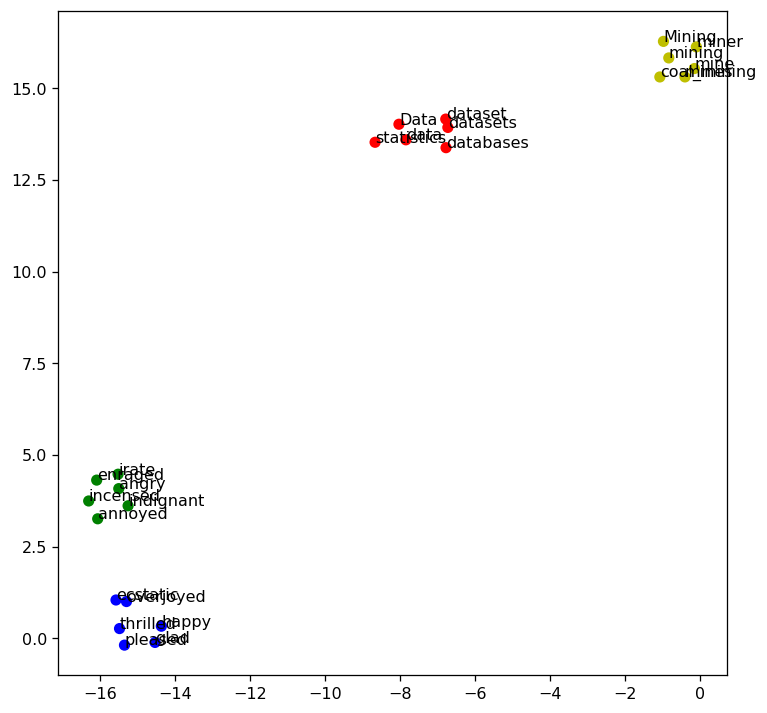

In [221]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

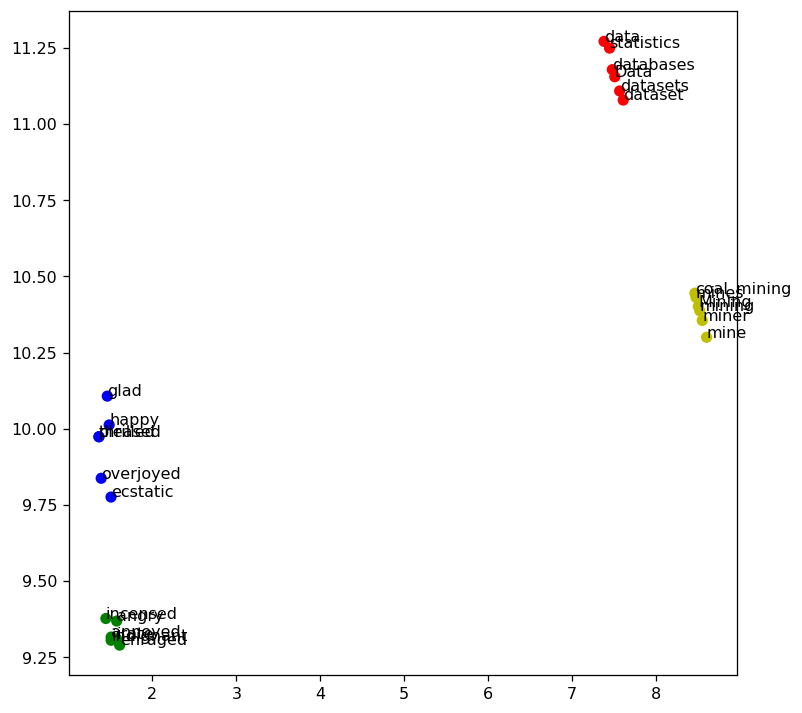

In [222]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

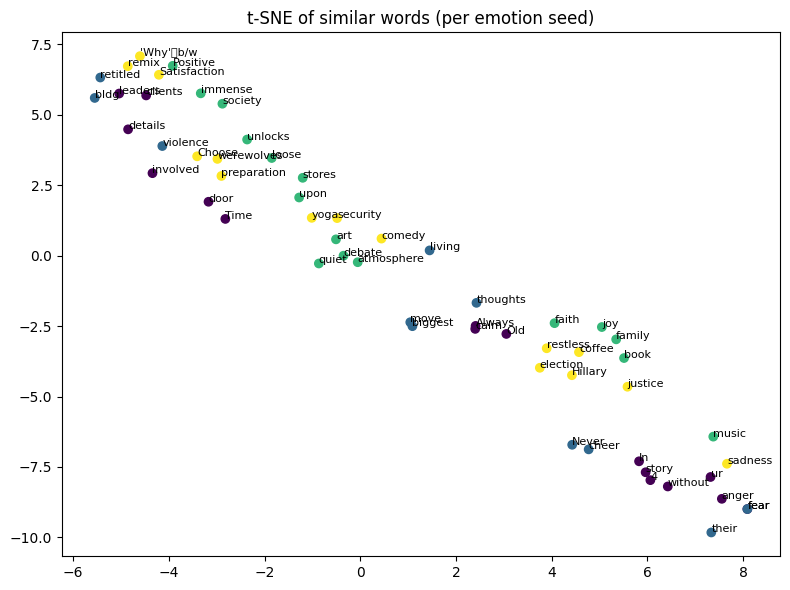

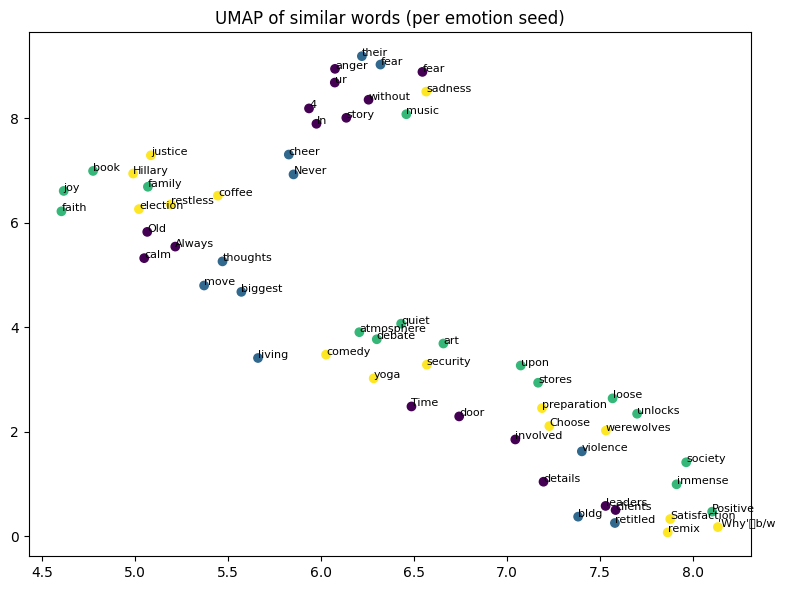

In [224]:
# Answer here
# === Exercise 8 ===
# Visualize 15 most-similar words for each target emotion word using t-SNE and UMAP.
import numpy as np
import matplotlib.pyplot as plt

# choose the model in priority: trained word2vec -> glove-twitter-25
model = None
vector_dim = 100
labels_to_plot = ['anger', 'fear', 'joy', 'sadness']  # matches dataset emotions
topk = 15

try:
    word2vec_model
    model = word2vec_model
    get_vec = lambda w: model.wv[w]
    most_sim = lambda w: model.wv.most_similar(w, topn=topk)
    vector_dim = model.vector_size
except NameError:
    try:
        import gensim.downloader as api
        import ssl
        ssl._create_default_https_context = ssl._create_unverified_context
        model = api.load("glove-twitter-25")
        get_vec = lambda w: model[w]
        most_sim = lambda w: model.most_similar(w, topn=topk)
        vector_dim = 25
    except Exception as e:
        print("No embeddings available; please run Word2Vec training or allow gensim to download a model.")
        raise

# Collect words and vectors
words = []
vecs = []
colors = []
for idx, seed in enumerate(labels_to_plot):
    # include the seed itself if present in vocab
    try:
        _ = get_vec(seed)
        words.append(seed); vecs.append(get_vec(seed)); colors.append(idx)
    except KeyError:
        pass
    # add top-k similar words
    try:
        sims = most_sim(seed)
        for w, _ in sims:
            if w not in words:
                words.append(w); vecs.append(get_vec(w)); colors.append(idx)
    except Exception:
        continue

X = np.vstack(vecs)

# t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=15, init='random', learning_rate='auto', random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=colors)
for i, w in enumerate(words):
    plt.text(X_tsne[i,0], X_tsne[i,1], w, fontsize=8)
plt.title("t-SNE of similar words (per emotion seed)")
plt.tight_layout(); plt.show()

# UMAP (optional if package available)
try:
    import umap
    um = umap.UMAP(n_components=2, random_state=42)
    X_umap = um.fit_transform(X)
    plt.figure(figsize=(8,6))
    plt.scatter(X_umap[:,0], X_umap[:,1], c=colors)
    for i, w in enumerate(words):
        plt.text(X_umap[i,0], X_umap[i,1], w, fontsize=8)
    plt.title("UMAP of similar words (per emotion seed)")
    plt.tight_layout(); plt.show()
except Exception as e:
    print("UMAP not available; skipped UMAP plot.")


# Conclusion:
# The t-SNE plot focuses on local structure — it keeps similar words close but may distort the overall layout, so distances between emotion groups are not meaningful. 
# The clusters appear linearly spread, showing fine-grained similarities within each emotion.

# In contrast, the UMAP plot preserves both local and global relationships, forming smoother, curved clusters that reflect how emotions transition semantically (e.g., from fear to joy). 
# It gives a more coherent view of the emotional landscape.

---